In [1]:
#Import the libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Import MNIST Dataset for  training
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [5]:
# tf Sequential model with 28x28 dimensions
tf.random.set_seed(34)
model = Sequential(
    [
        tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        Dense(units = 40, activation = 'sigmoid', name="l0"),
        Dense(units = 25, activation = 'sigmoid', name="l1"),
        Dense(units = 10, activation = 'softmax', name="l2")
    ], name="my_model"
)
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l0 (Dense)                      │ (None, 40)             │        31,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l1 (Dense)                      │ (None, 25)             │         1,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,685 (127.68 KB)

 Trainable params: 32,685 (127.68 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Training, using ADAM optimizer 
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
)

history = model.fit(
    train_X,train_y,
    epochs=80,
    validation_data=(test_X,test_y),
)

Epoch 1/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - loss: 1.6122 - val_loss: 0.5977
Epoch 2/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - loss: 0.5393 - val_loss: 0.4069
Epoch 3/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - loss: 0.3957 - val_loss: 0.3536
Epoch 4/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 324us/step - loss: 0.3556 - val_loss: 0.3271
Epoch 5/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step - loss: 0.3469 - val_loss: 0.3106
Epoch 6/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step - loss: 0.3131 - val_loss: 0.2977
Epoch 7/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 329us/step - loss: 0.2958 - val_loss: 0.2928
Epoch 8/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - loss: 0.2905 - val_loss: 0.2810
Epoch 9/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step - loss: 0.2815 - val_loss: 0.2792
Epoch 10/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - loss: 0.2757 - val_loss: 0.2760
Epoch 11/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step - loss: 0.2694 - val_loss: 0.2679
Epoch 12

In [8]:
# Evaluating the model from test set

results = model.evaluate(test_X, test_y, batch_size=256)
predictions = model.predict(test_X[:test_y.shape[0]])

j = 0 
count=0
for i in predictions:
    if(np.argmax(i)!=test_y[j]):
        count+=1
    j+=1
print(f"\n{count}/{test_y.shape[0]} Wrong Predictions,\n{test_y.shape[0]-count}/{test_y.shape[0]} Right Predictions,\nLoss = {results}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.1837
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step

474/10000 Wrong Predictions,
9526/10000 Right Predictions,
Loss = 0.16429884731769562


Text(0, 0.5, 'Loss')

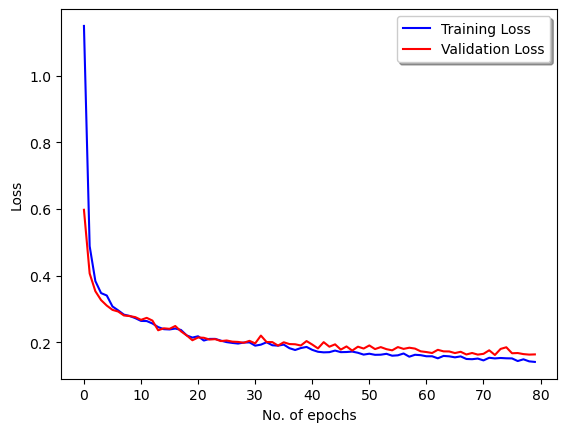

In [9]:
# Plot Loss function with epochs

fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], color='b', label="Training Loss")
ax.plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax.legend(loc='best', shadow=True)

plt.xlabel('No. of epochs')
plt.ylabel('Loss')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


 Predictions = [[5.8229096e-05 1.9268773e-04 9.7869611e-01 1.9495709e-02 4.8984757e-06
  1.9693643e-05 1.7388978e-05 1.1907776e-03 3.2249186e-04 2.0940902e-06]]
 Largest probability: 2



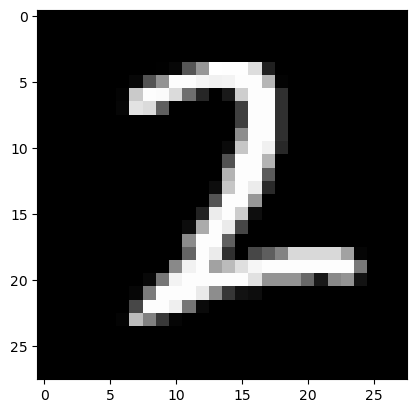

In [10]:
#Predicting a value from the test set (MNIST)

example = 1336

image = test_X[example]
plt.imshow(test_X[example], cmap=plt.get_cmap('gray'))

prediction = model.predict(image.reshape(1,28,28))  # prediction

print(f"\n\n Predictions = {prediction}")
print(f" Largest probability: {np.argmax(prediction)}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Predicted Value = 6



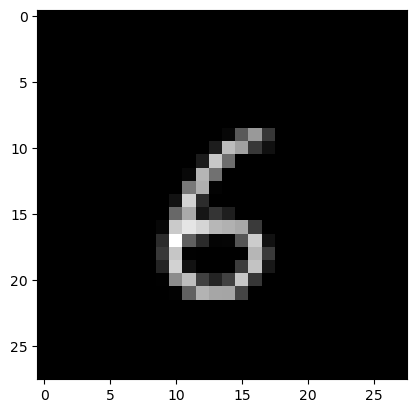

In [15]:
#Predicting from own data
path = 'test_images/6.png'

image = tf.keras.utils.load_img(
            path,
            color_mode="grayscale",
            interpolation="nearest",
            keep_aspect_ratio=False,
        )
image = image.resize([28,28])
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr[:,:,0]
plt.imshow(input_arr, cmap=plt.get_cmap('gray'))

arr = input_arr.reshape(1,28,28)
predictions = model.predict(arr)
print(f"\nPredicted Value = {np.argmax(predictions)}\n")